<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/KOKONAT/library_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7: Comparison between libraries**

**Library: Datatable**

**Group Name: KOKONAT**

**Group members:**

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| LING WAN YIN | A21EC0047 | Datatable|
|NG SUANG JOO | A21EC0102 |Pandas|
|FONG KHAH KHEH | A21EC0026 |Pyspark|

## **About the Dataset**

To give an overview of the chosen dataset, it is about an in-depth analysis of brewing variables, market sales patterns, and quality metrics in craft beer manufacturing (2020-2024). This extensive dataset encompasses a thorough collection of data spanning from January 2020 to January 2024, originating from a craft beer brewery. It provides a thorough insight into the brewing procedures and their impact on the market, incorporating a diverse range of brewing variables, sales data, and quality assessments. This dataset is around **2 GB** in size, and it encompasses 20 columns of attributes.


**Dataset URL:**
[Brewery Operations and Market Analysis Dataset](https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset)


## **Downloading the Dataset**

The Brewery Operations and Market Analysis dataset is sourced from Kaggle where we can utilised the Kaggle API to download the dataset.

1. Import the necessary library for file upload.

In [ ]:
# Import the necessary library for file upload.
from google.colab import files

2. Upload the Kaggle API token file ('kaggle.json') using the file upload widget. The file 'kaggle.json' can be found under your account settings in Kaggle.

In [ ]:
# Upload kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


3. Utilise the Kaggle API Token to extract the dataset.

In [ ]:
# Move Kaggle API Token to the Correct Directory
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Download the Kaggle dataset
!kaggle datasets download -d ankurnapa/brewery-operations-and-market-analysis-dataset

# Unzip the downloaded dataset
!unzip brewery-operations-and-market-analysis-dataset

 99% 1.05G/1.06G [00:14<00:00, 90.4MB/s]
100% 1.06G/1.06G [00:14<00:00, 76.7MB/s]
Archive:  brewery-operations-and-market-analysis-dataset.zip
  inflating: brewery_data_complete_extended.csv  


4. The dataset has been downloaded, extracted and is ready for further process.

## **Data Preparation and Cleaning**

Perform data preparation and cleaning before moving on to exploratory data analysis (EDA), such as determining whether any missing values exist, loading the dataset and exploring the number of rows & columns, ranges of values etc.



### Installing Datatable

In [ ]:
!pip install datatable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 MB 10.1 MB/s eta 0:00:00


### Load the dataset

In [ ]:
import datatable as dt
import timeit
import sys

dt_df = dt.fread('brewery_data_complete_extended.csv')

memory_usage = sys.getsizeof(dt_df)
time_load_data = timeit.timeit(lambda: dt_df, number=1)

print("Memory usage:", memory_usage / (1024 ** 2), "MB")
print("Computation Time:", time_load_data, "seconds")

Memory usage: 1490.3573122024536 MB
Computation Time: 1.8289999843545957e-06 seconds


### Display the first five rows

In [ ]:
import time
import psutil
start_time = time.time()

dt_df.head(5)

end_time = time.time()
exploration_time = end_time - start_time
memory = psutil.Process()
exploration_memory = memory.memory_info().rss / (1024 ** 2)
print("\nMemory usage:", exploration_memory ,"MB")
print("Computation Time:", exploration_time, "seconds")


Memory usage: 1589.44140625 MB
Computation Time: 0.0002903938293457031 seconds


###  Explore the number of rows & columns

In [ ]:
start_time = time.time()

num_rows, num_cols = dt_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

end_time = time.time()
exploration_time = end_time - start_time
memory = psutil.Process()
exploration_memory = memory.memory_info().rss / (1024 ** 2)
print("\nMemory usage:", exploration_memory ,"MB")
print("Computation Time:", exploration_time, "seconds")

Number of rows: 10000000
Number of columns: 20

Memory usage: 1589.44140625 MB
Computation Time: 0.009110450744628906 seconds


### Column type

In [ ]:
start_time = time.time()

# Display the data types of each column
column_types = list(zip(dt_df.names, dt_df.stypes))
print("\nData types of each column:\n")
for column, column_type in column_types:
    print(f"{column}: {column_type}")

end_time = time.time()
handle_missing_time = end_time - start_time
memory = psutil.Process()
handle_missing_memory = memory.memory_info().rss / (1024 ** 2)
print("\nMemory usage:", handle_missing_memory ,"MB")
print("Computation Time:", handle_missing_time, "seconds")


Data types of each column:

Batch_ID: stype.int32
Brew_Date: stype.time64
Beer_Style: stype.str32
SKU: stype.str32
Location: stype.str32
Fermentation_Time: stype.int32
Temperature: stype.float64
pH_Level: stype.float64
Gravity: stype.float64
Alcohol_Content: stype.float64
Bitterness: stype.int32
Color: stype.int32
Ingredient_Ratio: stype.str32
Volume_Produced: stype.int32
Total_Sales: stype.float64
Quality_Score: stype.float64
Brewhouse_Efficiency: stype.float64
Loss_During_Brewing: stype.float64
Loss_During_Fermentation: stype.float64
Loss_During_Bottling_Kegging: stype.float64

Memory usage: 1589.44140625 MB
Computation Time: 0.0008451938629150391 seconds


### Handling Missing Value

In [ ]:
start_time = time.time()

# Check for missing values using countna() in datatable
missing_values = dt_df.countna()
print("Missing values per column:")
print(missing_values.to_pandas().transpose())

end_time = time.time()
handle_missing_time = end_time - start_time
memory = psutil.Process()
handle_missing_memory = memory.memory_info().rss / (1024 ** 2)
print("\nMemory usage:", handle_missing_memory ,"MB")
print("Computation Time:", handle_missing_time, "seconds")

Missing values per column:
                              0
Batch_ID                      0
Brew_Date                     0
Beer_Style                    0
SKU                           0
Location                      0
Fermentation_Time             0
Temperature                   0
pH_Level                      0
Gravity                       0
Alcohol_Content               0
Bitterness                    0
Color                         0
Ingredient_Ratio              0
Volume_Produced               0
Total_Sales                   0
Quality_Score                 0
Brewhouse_Efficiency          0
Loss_During_Brewing           0
Loss_During_Fermentation      0
Loss_During_Bottling_Kegging  0

Memory usage: 1636.37890625 MB
Computation Time: 1.212653636932373 seconds


### Number of unique values per columns

In [ ]:
start_time = time.time()

dt_df.nunique()

end_time = time.time()
handle_missing_time = end_time - start_time
memory = psutil.Process()
handle_missing_memory = memory.memory_info().rss / (1024 ** 2)
print("\nMemory usage:", handle_missing_memory ,"MB")
print("Computation Time:", handle_missing_time, "seconds")


Memory usage: 1636.8359375 MB
Computation Time: 24.842097759246826 seconds


## **Exploratory Analysis and Visualization**

 Exploratory Data Analysis (EDA) is a crucial step in understanding the characteristics and patterns within a dataset. In this step, we utilize Matplotlib.Pyplot and the Seaborn library for visualizations.





### Summary Statistics

In [ ]:
start_time = time.time()

# Filter numeric columns
numeric_columns = dt_df[:, dt.f[dt.stype.float64, dt.stype.int64]]

# Compute mean, sum, range, and other statistics
numeric_stats = numeric_columns[:, {"Mean": dt.mean(dt.f[:]),
                                     "Sum": dt.sum(dt.f[:]),
                                     "Min": dt.min(dt.f[:]),
                                     "Max": dt.max(dt.f[:]),
                                     "StdDev": dt.sd(dt.f[:]),
                                     "Count": dt.count()}]

print("\nStatistics for numeric columns:")
print(numeric_stats.to_pandas())

end_time = time.time()
handle_missing_time = end_time - start_time
memory = psutil.Process()
handle_missing_memory = memory.memory_info().rss / (1024 ** 2)
print("\nMemory usage:", handle_missing_memory ,"MB")
print("Computation Time:", handle_missing_time, "seconds")


Statistics for numeric columns:
   Mean.Temperature  Mean.pH_Level  Mean.Gravity  Mean.Alcohol_Content  \
0         19.999899       4.999941      1.055003              5.249709   

   Mean.Total_Sales  Mean.Quality_Score  Mean.Brewhouse_Efficiency  \
0      10497.785344            7.999825                  80.000919   

   Mean.Loss_During_Brewing  Mean.Loss_During_Fermentation  \
0                  3.000081                       3.000002   

   Mean.Loss_During_Bottling_Kegging  ...  StdDev.pH_Level  StdDev.Gravity  \
0                           3.000159  ...         0.288638        0.014435   

   StdDev.Alcohol_Content  StdDev.Total_Sales  StdDev.Quality_Score  \
0                0.432961         5485.995545              1.154679   

   StdDev.Brewhouse_Efficiency  StdDev.Loss_During_Brewing  \
0                      5.77493                    1.154748   

   StdDev.Loss_During_Fermentation  StdDev.Loss_During_Bottling_Kegging  \
0                         1.154827                  

### Data Visualization

####Total Volume Produced by Beer Style

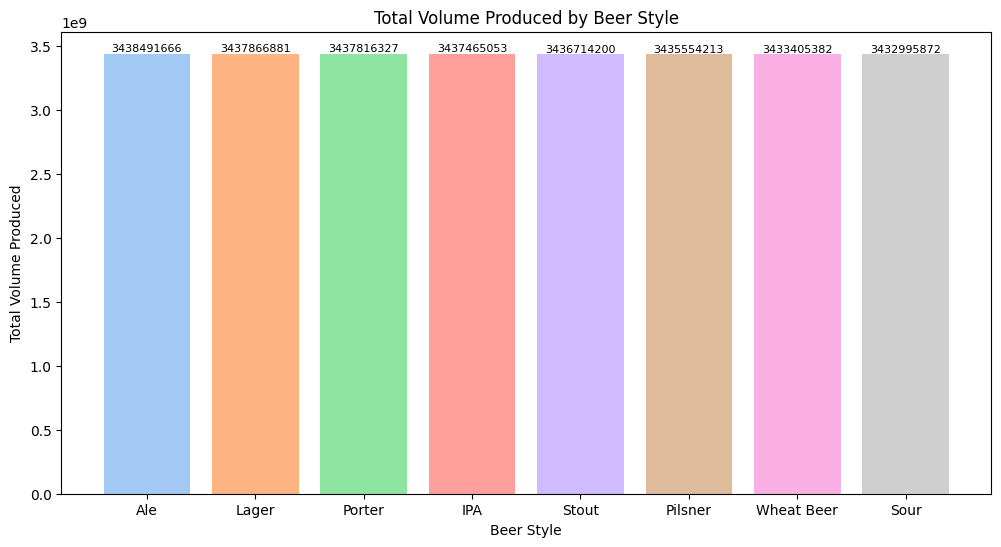

Memory usage: 1700.15625 MB
Computation Time: 3.834784746170044 seconds


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

start_time = time.time()

# Group by Beer_Style and calculate the total volume produced for each style
total_volume_by_style = dt_df[:, dt.sum(dt.f.Volume_Produced), dt.by(dt.f.Beer_Style)]

# Convert datatable frame to pandas DataFrame
total_volume_pd = total_volume_by_style.to_pandas()

# Sort the DataFrame in descending order based on 'Volume_Produced'
total_volume_pd.sort_values(by="Volume_Produced", ascending=False, inplace=True)

# Set the color palette for the plot
colors = sns.color_palette('pastel')

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
bars = plt.bar(total_volume_pd["Beer_Style"], total_volume_pd["Volume_Produced"], color=colors)
plt.title("Total Volume Produced by Beer Style")
plt.xlabel("Beer Style")
plt.ylabel("Total Volume Produced")

# Set x-axis tick labels without rotation
plt.xticks(rotation=0)

# Add labels to each bar in the plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()

end_time = time.time()
bar_time = end_time - start_time
memory = psutil.Process()
bar_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", bar_memory ,"MB")
print("Computation Time:", bar_time, "seconds")

**Insights:**

- The beer style 'Ale' is recorded as having the greatest total volume produced, which gives a hint of its popularity.

#### Average Fermentation Time by Beer Style

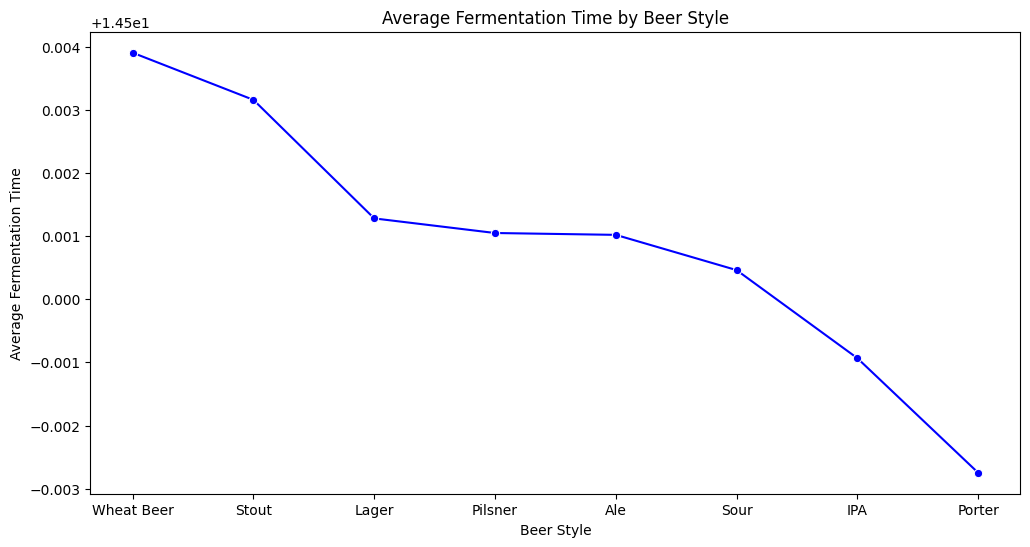

Memory usage: 1709.28125 MB
Computation Time: 3.4689340591430664 seconds


In [ ]:
start_time = time.time()

# Calculate average fermentation time by beer style
average_fermentation_time = dt_df[:, dt.mean(dt.f.Fermentation_Time), dt.by(dt.f.Beer_Style)]

# Convert the result to a pandas DataFrame
average_fermentation_time_pd = average_fermentation_time.to_pandas()

# Sort the result in descending order based on Fermentation_Time
average_fermentation_time_sorted = average_fermentation_time[:, :, dt.sort(-dt.f.Fermentation_Time)]

# Convert the sorted result to a pandas DataFrame
average_fermentation_time_sorted_pd = average_fermentation_time_sorted.to_pandas()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x="Beer_Style", y="Fermentation_Time", data=average_fermentation_time_sorted_pd, marker='o', color='blue')

# Set the title and axis labels
plt.title("Average Fermentation Time by Beer Style")
plt.xlabel("Beer Style")
plt.ylabel("Average Fermentation Time")

# Set x-axis tick labels without rotation
plt.xticks(rotation=0)

# Show the plot
plt.show()

end_time = time.time()
line_time = end_time - start_time
memory = psutil.Process()
line_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", line_memory, "MB")
print("Computation Time:", line_time, "seconds")

**Insights:**

- The beer style 'Wheat Beer' takes the longest fermentation time compared to other beer styles.

#### Fermentation Time by Beer Style

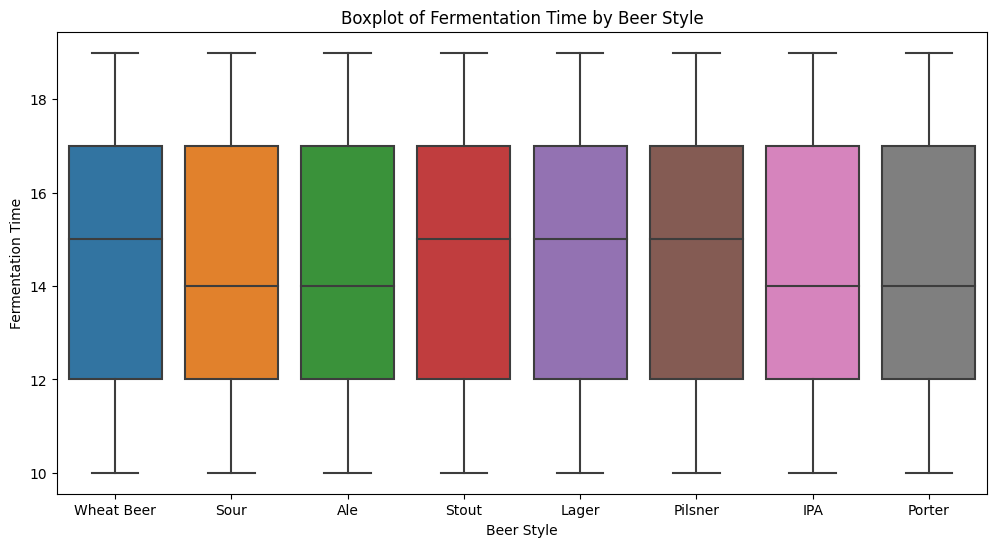

Memory usage: 1836.5234375 MB
Computation Time: 19.270102739334106 seconds


In [ ]:
start_time = time.time()

# Create a boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Beer_Style', y='Fermentation_Time', data=dt_df.to_pandas())

# Set the title and axis labels
plt.title('Boxplot of Fermentation Time by Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Fermentation Time')

# Show the plot
plt.show()

end_time = time.time()
line_time = end_time - start_time
memory = psutil.Process()
line_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", line_memory, "MB")
print("Computation Time:", line_time, "seconds")

**Insights:**

- There are no outliers in fermentation time for every beer style. The beer styles 'Sour', 'Ale', 'IPA', and 'Porter' have a lower median value, which indicates that the distribution of the data is skewed to the left. The skewness explains that there are more data points concentrated on the right side of the median, leading us to comprehend that the majority of those beer styles have a fermentation time greater than 14 days.

#### Correlation between the Fermentation_Time, Temperature, pH_Level, Gravity, and Quality_Score

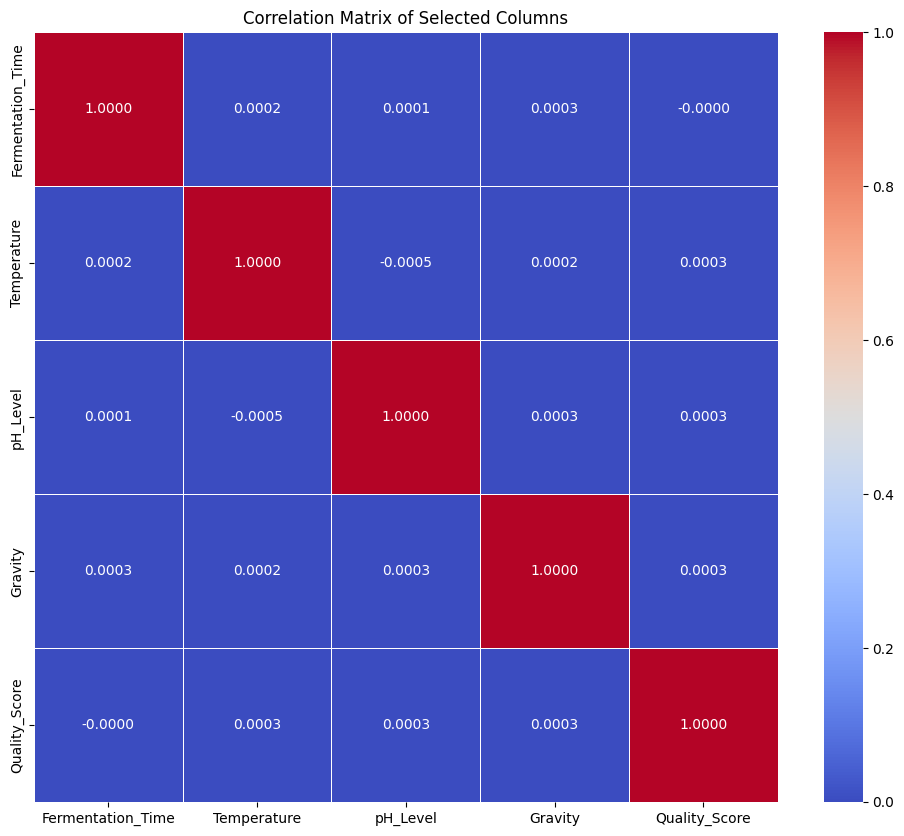

Memory usage: 1836.73828125 MB
Computation Time: 1.546203374862671 seconds


In [ ]:
start_time = time.time()

# Define the columns for which correlation is to be calculated
cor_cols = ['Fermentation_Time', 'Temperature', 'pH_Level', 'Gravity', 'Quality_Score']

# Select the specified columns from the datatable frame
dt_df_cor = dt_df[:, cor_cols]

# Convert the datatable frame to a pandas DataFrame
correlation_matrix = dt_df_cor.to_pandas().corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation Matrix of Selected Columns')
plt.show()

end_time = time.time()
corr_time = end_time - start_time
memory = psutil.Process()
corr_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", corr_memory, "MB")
print("Computation Time:", corr_time, "seconds")

**Insights:**

- A negative correlation coefficient indicates an inverse relationship between two variables, meaning that as one variable increases, the other tends to decrease, and vice versa. In the context of pH_Level and Temperature, a correlation coefficient of -0.0005 suggests a very weak negative correlation.

#### Total Sales by Beer Style

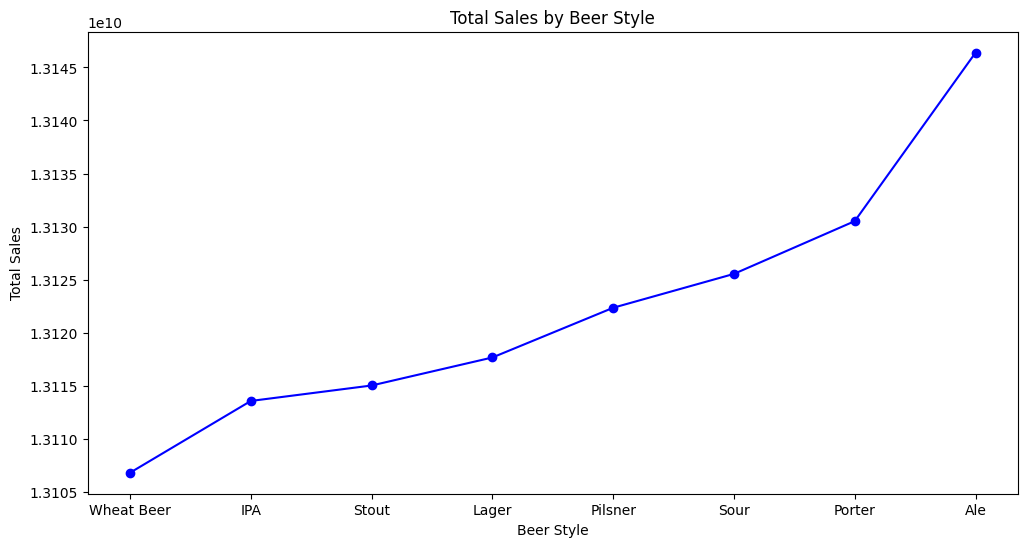

Memory usage: 1836.91015625 MB
Computation Time: 3.6258678436279297 seconds


In [ ]:
start_time = time.time()

# Group by Beer_Style and calculate the total sales for each style
total_sales_by_style = dt_df[:, dt.sum(dt.f.Total_Sales), dt.by(dt.f.Beer_Style)]

# Convert the datatable frame to a pandas DataFrame
total_sales_pd = total_sales_by_style.to_pandas()

# Sort the data in descending order based on Total_Sales
total_sales_pd.sort_values(by="Total_Sales", inplace=True)

# Plot the total sales by beer style
plt.figure(figsize=(12, 6))
plt.plot(total_sales_pd["Beer_Style"], total_sales_pd["Total_Sales"], marker='o', color='blue')

# Set the title and axis labels
plt.title("Total Sales by Beer Style")
plt.xlabel("Beer Style")
plt.ylabel("Total Sales")

# Set x-axis tick labels without rotation
plt.xticks(rotation=0)

# Show the plot
plt.show()

end_time = time.time()
line2_time = end_time - start_time
memory = psutil.Process()
line2_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", line2_memory ,"MB")
print("Computation Time:", line2_time, "seconds")

**Insights:**

- The beer style 'Ale' has the highest total sales, whereas 'Wheat Beer' is the least popular beer.

####Total Loss by Beer Style

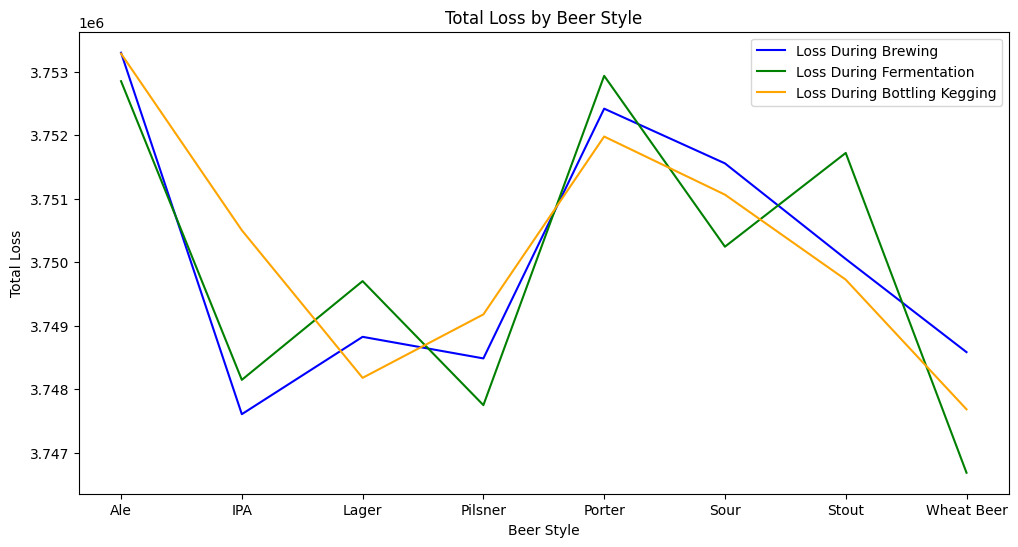


Memory usage: 1836.9296875 MB
Computation Time: 4.293145418167114 seconds


In [ ]:
start_time = time.time()

# Group by Beer_Style and calculate the total loss for each category
total_loss_by_style = dt_df[:, {"Loss_During_Brewing": dt.sum(dt.f.Loss_During_Brewing),
                                "Loss_During_Fermentation": dt.sum(dt.f.Loss_During_Fermentation),
                                "Loss_During_Bottling_Kegging": dt.sum(dt.f.Loss_During_Bottling_Kegging)},
                             dt.by(dt.f.Beer_Style)]

# Convert the datatable frame to a pandas DataFrame
total_loss_pd = total_loss_by_style.to_pandas()

# Plot the total loss for each category by beer style
plt.figure(figsize=(12, 6))
plt.plot(total_loss_pd["Beer_Style"], total_loss_pd["Loss_During_Brewing"], label='Loss During Brewing', color='blue')
plt.plot(total_loss_pd["Beer_Style"], total_loss_pd["Loss_During_Fermentation"], label='Loss During Fermentation', color='green')
plt.plot(total_loss_pd["Beer_Style"], total_loss_pd["Loss_During_Bottling_Kegging"], label='Loss During Bottling Kegging', color='orange')

# Set the title and axis labels
plt.xlabel('Beer Style')
plt.ylabel('Total Loss')
plt.title('Total Loss by Beer Style')

# Set x-axis tick labels without rotation
plt.xticks(rotation=0)

# Display the legend
plt.legend()

# Show the plot
plt.show()

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)
print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

**Insights:**

- The distribution pattern for the total loss—loss during brewing and loss during bottling or kegging—remains the same or has minimal changes. However, the beer styles 'Lager' and 'Pilsner' do not exhibit the same pattern distribution. This insight suggests that the brewing and bottling/kegging processes may have distinct impacts on the overall loss for these specific beer styles.

- 'Pilsner' beer style has the lowest total value for the volume lost during fermentation. This indicates that, on average, 'Pilsner' beers experience lower losses during fermentation compared to other styles. The lower fermentation loss may be attributed to the specific characteristics or brewing methods associated with 'Pilsner' beers.

## **Asking and Answering Questions**

In this section, we ask five questions to further understand the major characteristics of data.



### Q1: Which beer style has the highest average quality score?


Top 5 Beer Styles with the Highest Quality Scores:
   | Beer_Style  Mean_Quality_Score
   | str32                  float64
-- + ----------  ------------------
 0 | Sour                   8.00114
 1 | Wheat Beer             8.00046
 2 | IPA                    8.00018
 3 | Stout                  7.99984
 4 | Lager                  7.99962
[5 rows x 2 columns]



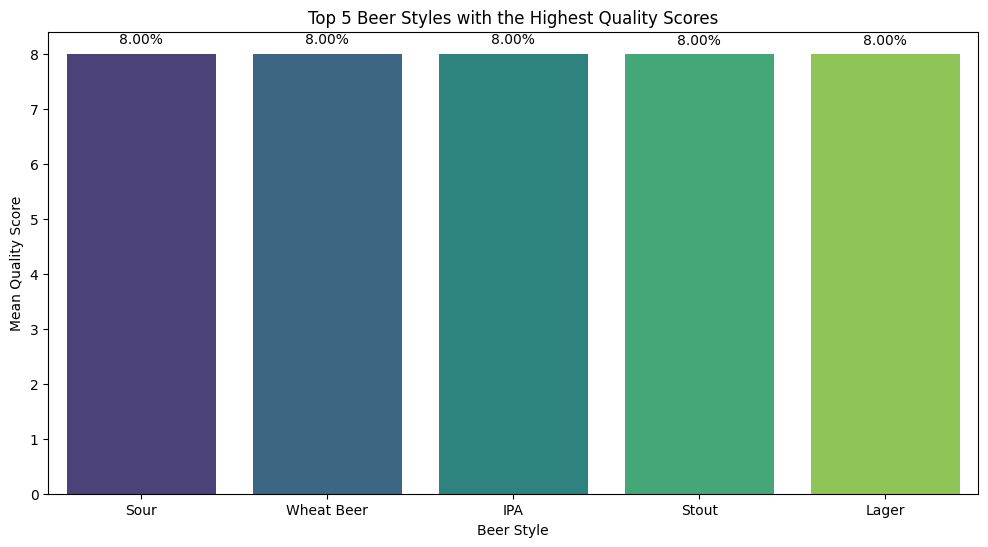

Memory usage: 1836.94921875 MB
Computation Time: 5.6027984619140625 seconds


In [ ]:
start_time = time.time()

# Group by Beer_Style and calculate the mean Quality_Score for each beer style
average_quality_by_style = dt_df[:, {"Mean_Quality_Score": dt.mean(dt.f.Quality_Score)}, dt.by(dt.f.Beer_Style)]

# Sort the result in descending order based on the mean quality score
sorted_result_dt = average_quality_by_style[:, :].sort("Mean_Quality_Score")
sorted_result_dt = sorted_result_dt[::-1, :]

# Get the overall mean quality score
overall_mean_quality = dt_df[:, dt.mean(dt.f.Quality_Score)][0, 0]

# Select the top 5 styles
top5_styles_dt = sorted_result_dt[:5, "Beer_Style"]
top5_scores_dt = sorted_result_dt[:5, "Mean_Quality_Score"]

# Display the result with overall percentage
print("Top 5 Beer Styles with the Highest Quality Scores:")
print(dt.Frame({"Beer_Style": top5_styles_dt, "Mean_Quality_Score": top5_scores_dt}))

# Plot the top 5 beer styles with the highest quality scores
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Beer_Style", y="Mean_Quality_Score", data=sorted_result_dt.head(5).to_pandas(), palette="viridis")

# Annotate each bar with the percentage value
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Set the title and axis labels
plt.title("Top 5 Beer Styles with the Highest Quality Scores")
plt.xlabel("Beer Style")
plt.ylabel("Mean Quality Score")

# Set x-axis tick labels without rotation
plt.xticks(rotation=0)

# Show the plot
plt.show()

end_time = time.time()
total_volume_location_time = end_time - start_time
memory = psutil.Process()
total_volume_location_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", total_volume_location_memory, "MB")
print("Computation Time:", total_volume_location_time, "seconds")

**Insights:**

- The beer style with the highest average quality score is 'Sour' with a value of 8.00%.

###Q2: What is the total volume produced for each location?

Total Volume Produced by Location:
          Location  Volume_Produced
0  Electronic City       2744848424
1       HSR Layout       2750592166
2      Indiranagar       2749066239
3        Jayanagar       2750760812
4      Koramangala       2749833908
5      Malleswaram       2747512261
6     Marathahalli       2748916542
7      Rajajinagar       2749725468
8       Whitefield       2748458725
9        Yelahanka       2750595049


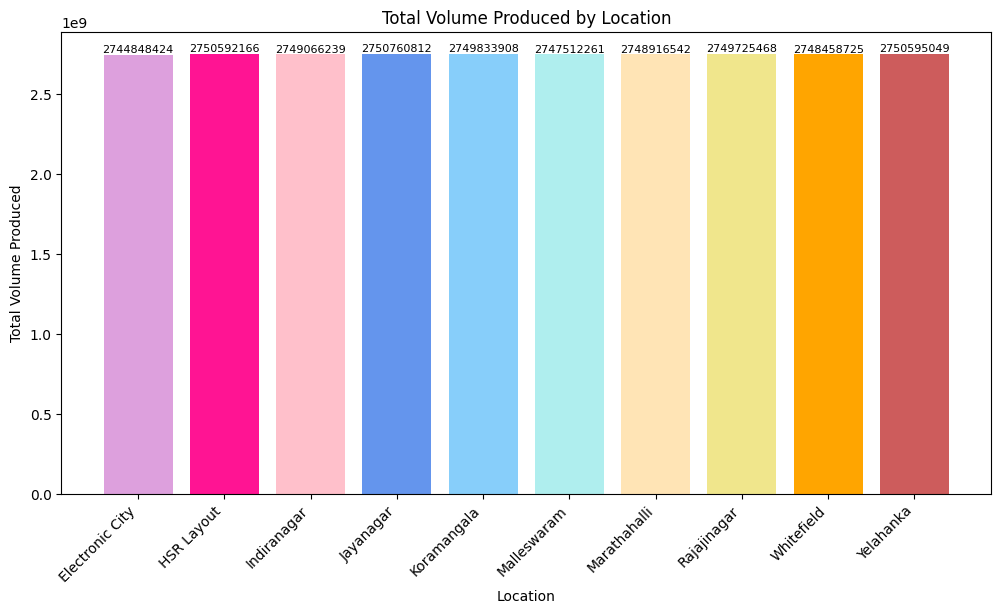

Memory usage: 1837.28515625 MB
Computation Time: 4.686341762542725 seconds


In [ ]:
start_time = time.time()

# Calculate the total volume produced by location using datatable
total_volume_by_location = dt_df[:, dt.sum(dt.f.Volume_Produced), dt.by(dt.f.Location)]

# Convert the datatable frame to a pandas DataFrame
total_volume_pd = total_volume_by_location.to_pandas()

# Define colors for the bar chart
colors = ['plum','deeppink','pink','cornflowerblue','lightskyblue', 'paleturquoise','moccasin','khaki','orange','indianred']

# Plot the total volume produced by location as a bar chart
plt.figure(figsize=(12, 6))
bars=plt.bar(total_volume_pd["Location"], total_volume_pd["Volume_Produced"],color=colors)

# Set the title and axis labels
plt.title("Total Volume Produced by Location")
plt.xlabel("Location")
plt.ylabel("Total Volume Produced")

# Rotate the x-axis labels
plt.xticks(rotation=45,ha='right')

print("Total Volume Produced by Location:")
print(total_volume_pd)

# Display the total volume produced for each location on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()

end_time = time.time()
total_volume_location_time = end_time - start_time
memory = psutil.Process()
total_volume_location_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", total_volume_location_memory, "MB")
print("Computation Time:", total_volume_location_time, "seconds")

**Insights:**

- The highest total volume produced is in 'Jayanagar', followed by 'Yelahanka'. The lowest total volume produced is in 'Electronic City'.

###Q3: What is the relation between fermentation time and alcohol content?

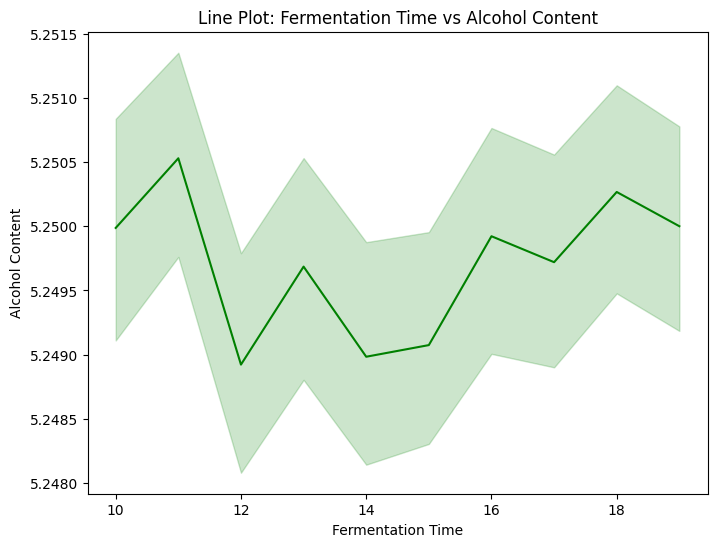

Memory usage: 6056.5546875 MB
Computation Time: 324.1450011730194 seconds


In [ ]:
start_time = time.time()

# Convert the datatable frame to a pandas DataFrame
df_for_plot = dt_df.to_pandas()

# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='Fermentation_Time', y='Alcohol_Content', data=df_for_plot, color='green')

# Set the title and axis labels
plt.title('Line Plot: Fermentation Time vs Alcohol Content')
plt.xlabel('Fermentation Time')
plt.ylabel('Alcohol Content')

# Show the plot
plt.show()

end_time = time.time()
ferm_alcohol_time = end_time - start_time
memory = psutil.Process()
ferm_alcohol_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", ferm_alcohol_memory, "MB")
print("Computation Time:", ferm_alcohol_time, "seconds")

**Insights:**
- Higher alcohol content does not neccessarily require longer fermentation time.

###Q4. Which ingredient ratio is associated with the highest total sales?

In [ ]:
start_time = time.time()

# Group by Ingredient_Ratio and calculate the total sales for each ratio using datatable
highest_sales_ratio = dt_df[:, dt.sum(dt.f.Total_Sales), dt.by(dt.f.Ingredient_Ratio)]

# Sort the results in ascending order based on Total_Sales
sorted_results = highest_sales_ratio[:, :].sort("Total_Sales")

# Select the last row with the highest average quality score
highest_total_sales= sorted_results[-1, dt.f.Ingredient_Ratio]

print("Ingredient ratio associated with the highest total sales:", highest_total_sales[0, 0])

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)
print("\nMemory usage:", loss_memory, "MB")
print("Computation Time:", loss_time, "seconds")

Ingredient ratio associated with the highest total sales: 1:0.41:0.20

Memory usage: 6056.640625 MB
Computation Time: 6.485427141189575 seconds


**Insights:**

- The particular combination of ingredients in the 1:0.41:0.20 ratio may help create a flavour profile that appeals to customers and increases sales.

###Q5: What is the average loss during brewing, fermentation, and bottling/kegging for each beer style?

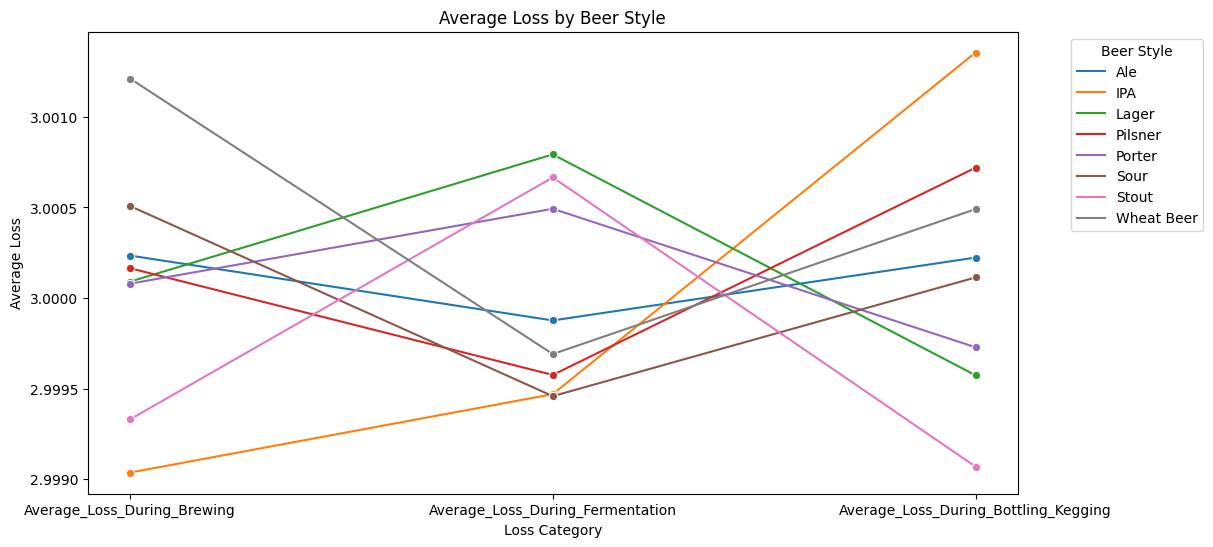

Memory usage: 6057.4296875 MB
Computation Time: 3.5246875286102295 seconds


In [ ]:
start_time = time.time()

# Group by Beer_Style and calculate the mean loss for each category
average_loss_by_style = dt_df[:, {"Average_Loss_During_Brewing": dt.mean(dt.f.Loss_During_Brewing),
                                  "Average_Loss_During_Fermentation": dt.mean(dt.f.Loss_During_Fermentation),
                                  "Average_Loss_During_Bottling_Kegging": dt.mean(dt.f.Loss_During_Bottling_Kegging)},
                               dt.by(dt.f.Beer_Style)]

# Convert the datatable frame to a pandas DataFrame and melt it for better visualization
average_loss_by_style_pd = average_loss_by_style.to_pandas().melt(id_vars='Beer_Style',
                                                                  var_name='Loss_Category',
                                                                  value_name='Average_Loss')

# Plot a line plot to visualize the average loss by beer style for each category
plt.figure(figsize=(12, 6))
sns.lineplot(x='Loss_Category', y='Average_Loss', hue='Beer_Style', data=average_loss_by_style_pd, marker='o')

# Set the title and axis labels
plt.title('Average Loss by Beer Style')
plt.xlabel('Loss Category')
plt.ylabel('Average Loss')

# Set x-axis tick labels without rotation
plt.xticks(rotation=0)

# Add legend with title and adjust its position
plt.legend(title='Beer Style', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

end_time = time.time()
avg_loss_time = end_time - start_time
memory = psutil.Process()
avg_loss_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", avg_loss_memory, "MB")
print("Computation Time:", avg_loss_time, "seconds")

**Insights:**

- In terms of average loss during brewing, 'Wheat Beer' is the one on top of the peak, whereas 'Lager' is recorded as the beer style with the highest percentage of volume loss during fermentation. 'IPA' contributes the highest percentage of volume loss during the bottling or kegging process.

## **Inferences and Conclusion**

In the context of the data analysis, several key insights and conclusions were drawn from the dataset:

**1. Total Volume Produced by Beer Style**

  The visualization of total volume produced by beer style revealed that each beer style contributes differently to the overall production.  In terms of overall volume produced, 'Sour' produced the least amount, while 'Ale' contributed the most.

**2. Average Fermentation Time by Beer Style**


  There were differences in the brewing process, as seen by the line plot showing the average fermentation time for each kind of beer. Different brewing methods or recipes may have contributed to the prolonged fermentation times observed in some beer varieties.

**3. Correlation Analysis**


  The correlation heatmap revealed information about the connections between several brewing factors. Certain pairs of variables, such as pH level and temperature, showed connections. Brewers may enhance the quality of their beer and streamline their operations by comprehending these connections.

**4. Quality Score by Beer Style**

  The analysis of quality scores by beer style determined which styles, on average, received the highest quality ratings. Those brewers who are looking to improve the quality of their products will find this information to be helpful.

**5. Total Volume Produced by Location**

  The bar chart illustrating the total volume produced by location highlighted variations in production across different areas. Every location made a substantial contribution, and the data can be used to determine which brewing facilities are the most productive. From the bar chart, it can be concluded that 'Jayanagar' is the most productive brewing facility among the listed locations, as it exhibits the highest total volume produced.

**6. Average Loss by Beer Style**

  The average loss by beer style line plot provided information on possible places where the brewing process could be improved. Breweries may reduce losses and maximize efficiency by knowing the average loss for each beer style.


## **References and Future Work**

**References:**

1. Seaborn Documentation: https://seaborn.pydata.org/

2. Datatable Documentation: https://datatable.readthedocs.io/en/latest/

3. Brewery Operations and Market Analysis Dataset: https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset


**Future Work:**

1. Predictive Modelling

  Create predictive models using different features from the dataset to forecast the production of beer.

2. Customer Segmentation

 To determine distinct market segments for focused marketing initiatives, examine consumer preferences and behavior.